# Word2Vec

김성동

참고 : https://shuuki4.wordpress.com/2016/01/27/word2vec-%EA%B4%80%EB%A0%A8-%EC%9D%B4%EB%A1%A0-%EC%A0%95%EB%A6%AC/ 

코드 : https://github.com/hunkim/TensorFlow-Tutorials/blob/master/8_word2vec.py

In [1]:
import os

In [2]:
os.getcwd()

'/notebooks/NLP'

## One-hot encoding 

컴퓨터가 인간의 언어를 이해하고 분석할 수 있도록 하는 NLP 분야!

그러기 위해서는 컴퓨터가 단어의 차이를 이해해야 한다. 하지만 단순히 단어 '사과', '토마토'를 컴퓨터에게 입력시킨다면 이를 컴퓨터는 유니코드의 조합으로만 볼 뿐 차이는 인식하지 못할 것이다.

기본적으로 컴퓨터가 어떤 단어에 대해 인지할 수 있게 하기 위해서는 수치적인 방식으로 단어를 표현할 수 있어야 한다. 그러나 앞서 말했듯이, 수치화를 통해 단어의 개념적 차이를 나타내기가 근본적으로 힘들었다. 이 한계를 극복하기 전의 NLP는 ‘one-hot encoding’ 방식을 많이 사용했다. 예를 들어, 내가 어떤 단어들이 있는지에 대한 단어 n개짜리 ‘사전’ (Dictionary)이 있다고 해보자. 이 때, 어떤 단어를 표현하기 위해서 길이 n짜리 벡터를 하나 만들고, 그 단어가 해당되는 자리에 1을 넣고 나머지 자리들에는 0을 넣는 것이다.  사전이 [감자, 딸기, 사과, 수박] 이라면 사과를 표현하는 벡터는 [0, 0, 1, 0] 이 되는 식이다.

Naive Bayes를 이용한 스팸 분류기가 이 방법을 사용하는 전형적인 예시라고 생각할 수 있겠다. 단어 자체를 벡터화한 것은 아니지만, 이 경우 이메일 전체를 보면서 어떤 단어가 있으면 1, 없으면 0으로 나타내는 식으로 이메일 하나에 대한 벡터를 만든다. 이 방식은 당시에는 나름 좋은 성능을 내었고, 지금까지도 사용하는 사람들이 있지만 컴퓨터 자체가 ‘단어가 본질적으로 다른 단어와 어떤 차이점을 가지는 지 이해할 수가 없다’ 는 아주 큰 단점이 존재한다.

## Word2Vec 

이러한 단점을 극복하기 위해 연구자들은 단어 자체가 가지는 의미 자체를 다차원 공간에서 '벡터화'하는 방식을 고안하게 되었다. 단어의 의미 자체를 벡터화할 수 있게 된다면, 기본적으로 이 것을 사용해서 할 수 있는 일들이 굉장히 많아진다. 

### How to train Word Vectors? 

NNLM, RNNLM, CBOW, Skip-gram 등 여러 아키텍처가 존재하지만 그 전에 앞서, 단어의 벡터화를 학습하는 과정에서 가장 중요한 가정에 대해 언급하고 지나가야할 것 같다. 모든 Word Embedding 관련 학습들은 기본적으로 언어학의 'Distributional Hypothesis'라는 가정에 입각하여 이루어진다. 이는 '비슷한 분포를 가진 단어들은 비슷한 의미를 가진다'라는 의미이다. 여기서 비슷한 분포를 가졌다는 것은 기본적으로 단어들이 같은 문맥에서 등장한다는 것을 의미. 

NNLM, RNNLM -> 뉴럴넷을 이용한 모델인데 연산량이 엄청 나다..

### CBOW 

주어진 단어에 대해 앞 뒤로 C/2개 씩 총 C개의 단어를 Input으로 사용하여, 주어진 단어를 맞추기 위한 네트워크를 만든다. 날이 더우니 ㅡㅡㅡ을 먹고싶다. (아이스크림)

([the, brown], quick), ([quick, fox], brown), ([brown, jumped], fox), ...

CBOW 모델은 크게 Input layer, Projection layer, Output layer로 이루어져 있다. 그림에는 중간 레이어가 Hidden layer라고 표시되어 있기는 하지만, Input에서 중간 레이어로 가는 과정이 weight를 곱해주는 것이라기 보다는 단순히 Projection하는 과정에 가까우므로 Projection layer라는 이름이 더 적절할 것 같다. 

Input layer에서 Projection layer로 갈 때는 모든 단어들이 공통적으로 사용하는 VxN 크기의 Projection Matrix W가 있고 (N은 Projection Layer의 길이 = 사용할 벡터의 길이), Projection layer에서 Output layer로 갈 때는 NxV 크기의 Weight Matrix W'가 있다. (이 두 행렬은 별개)

Input에서는 NNLM 모델과 똑같이 단어를 one-hot-encoding으로 넣어주고, 여러 개의 단어를 각각 projection 시킨 후 그 벡터들의 평균을 구해서 Projection layer에 보낸다. 그 뒤는 여기에 weight matrix를 곱해서 Output layer로 보내고 sofrmax 계산을 한 후, 이 결과를 진짜 단어의 one-hot encoding과 비교하여 에러를 계산한다.

전체 계산량이 NNLM이나 RNNLM에 비해 엄청나게 줄어듬

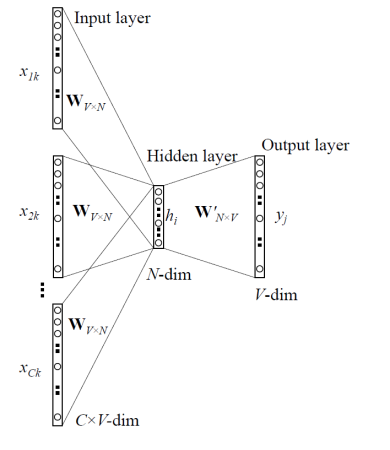

In [48]:
Image(filename='cbow.png', width=300) 

### Skip-gram 

다른 하나의 모델인 Skip-gram 모델은 CBOW와는 반대 방향의 모델이라고 생각할 수 있다. 현재 주어진 단어 하나를 가지고 주위에 등장하는 나머지 몇 가지의 단어들의 등장 여부를 유추하는 것이다. 

이 때 예측하는 단어들의 경우 현재 단어 주위에서 샘플링하는데, '가까이 위치해 있는 단어일수록 현재 단어와 관련이 더 많은 단어일 것이다'라는 생각을 적용하기 위해 멀리 떨어져있는 단어일수록 낮은 확률로 택하는 방법을 사용한다. 나머지 구조는 CBOW와 방향만 반대일 뿐 굉장히 유사하다.

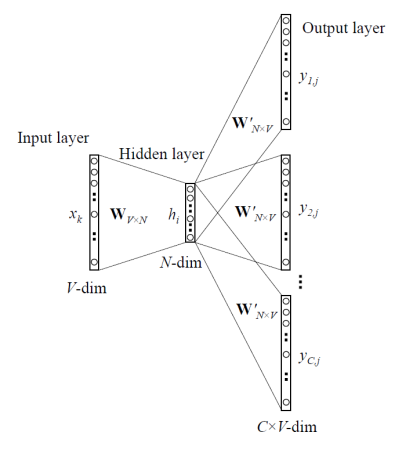

In [49]:
Image(filename='skip-gram.png', width=300) 

알고리즘적으로 이 두 모델은 상당히 흡사하다. CBOW는 문장에서 비어있는 타겟 단어를 예측한다면 skip-gram은 반대로 타겟 단어로부터 주변에 있을만한 단어를 예측한다. 
이 차이는 임의로 선택으로 해도 될 것처럼 여겨지지만 통계적으로 많은 분포적 정보(전체 context를 하나의 observation으로 다룰 경우) 더 효과적이다. 많은 파트에서, 더 작은 데이터셋에서도 유용함이 밝혀졌다. 하지만 skip-gram은 각 context-target 페어를 새로운 observation으로 다루며, 이는 더 큰 데이터셋을 가지고 있을 때 더 좋은 경향이 있다. 우리는 skip-gram 모델에 집중해서 살펴볼 것이다.

### 패키지 임포트

In [1]:
import collections
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### 설정

In [2]:
batch_size = 20
# embedding vector의 차원. 
# 2개의 차원은 의미있는 embedding을 얻기엔 너무 작지만
# 지금은 심플한 비주얼라이제이션만 하려고 하는 거니까
embedding_size = 2
num_sampled = 15 # number of negative examples to sample


### 샘플 문장들

In [3]:
sentences = ["the quick brown fox jumped over the lazy dog",
            "I love cats and dogs",
            "we all love cats and dogs",
            "cats and dogs are great",
            "sung likes cats",
            "she loves dogs",
            "cats can be very independent",
            "cats are great companions when they want to be",
            "cats are playful",
            "cats are natural hunters",
            "It's raining cats and dogs",
            "dogs and cats love sung"]

### 많이 쓰인 5개 단어 

In [4]:
# sentences to words and count
words = " ".join(sentences).split()
count = collections.Counter(words).most_common()
print "Word count", count[:5]

Word count [('cats', 10), ('dogs', 6), ('and', 5), ('are', 4), ('love', 3)]


### 워드 딕셔너리 생성

In [5]:
# Build dictionaries
rdic = [i[0] for i in count] # reverse dic, idx->word

In [11]:
rdic

['cats',
 'dogs',
 'and',
 'are',
 'love',
 'be',
 'sung',
 'great',
 'the',
 'raining',
 'all',
 'when',
 'over',
 'we',
 'playful',
 'want',
 'to',
 'jumped',
 'hunters',
 'companions',
 'fox',
 'very',
 "It's",
 'can',
 'brown',
 'lazy',
 'I',
 'independent',
 'they',
 'natural',
 'dog',
 'she',
 'loves',
 'quick',
 'likes']

In [15]:
dic = {w: i for i,w in enumerate(rdic)}

In [16]:
dic

{'I': 26,
 "It's": 22,
 'all': 10,
 'and': 2,
 'are': 3,
 'be': 5,
 'brown': 24,
 'can': 23,
 'cats': 0,
 'companions': 19,
 'dog': 30,
 'dogs': 1,
 'fox': 20,
 'great': 7,
 'hunters': 18,
 'independent': 27,
 'jumped': 17,
 'lazy': 25,
 'likes': 34,
 'love': 4,
 'loves': 32,
 'natural': 29,
 'over': 12,
 'playful': 14,
 'quick': 33,
 'raining': 9,
 'she': 31,
 'sung': 6,
 'the': 8,
 'they': 28,
 'to': 16,
 'very': 21,
 'want': 15,
 'we': 13,
 'when': 11}

In [18]:
voc_size = len(dic)
print voc_size

35


In [21]:
data = [dic[word] for word in words]
print 'Sample data', data[:10], [rdic[t] for t in data[:10]]

Sample data [8, 33, 24, 20, 17, 12, 8, 25, 30, 26] ['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog', 'I']


words에는 단어 리스트

dic에는 (word, index)

data에는 index,

rdic에는 index -> word

### 데이터 전처리  for Cbow, Skip_Gram 

In [23]:
# Let's make a training data for window size 1 for simplicity
# ([the, brown], quick), ([quick, fox], brown), ([brown, jumped], fox), ...
cbow_pairs = []
for i in range(1, len(data) - 1):
    cbow_pairs.append([[data[i-1], data[i+1]], data[i]])
print 'Context pairs', cbow_pairs[:10]

Context pairs [[[8, 24], 33], [[33, 20], 24], [[24, 17], 20], [[20, 12], 17], [[17, 8], 12], [[12, 25], 8], [[8, 30], 25], [[25, 26], 30], [[30, 4], 26], [[26, 0], 4]]


In [24]:
# Let's make skip-gram pairs
# (quick, the), (quick, brown), (brown, quick) ...
skip_gram_pairs = []
for c in cbow_pairs:
    skip_gram_pairs.append([c[1], c[0][0]])
    skip_gram_pairs.append([c[1], c[0][1]])
print 'skip-gram pairs', skip_gram_pairs[:5]
    
    
    

skip-gram pairs [[33, 8], [33, 24], [24, 33], [24, 20], [20, 24]]


### mini-batch 함수 

In [25]:
def generate_batch(size):
    assert size < len(skip_gram_pairs)
    x_data = []
    y_data = []
    r = np.random.choice(range(len(skip_gram_pairs)), size, replace=False)
    for i in r:
        x_data.append(skip_gram_pairs[i][0]) # n dim
        y_data.append([skip_gram_pairs[i][1]]) # n, 1 dim
    return x_data, y_data

In [26]:
# generate_batch test
print 'Batches (x,y)', generate_batch(3)

Batches (x,y) ([31, 0, 9], [[0], [2], [0]])


### 모델 정의 

In [27]:
# Input data
train_inputs = tf.placeholder(tf.int32, shape=[batch_size])
# need to shape [batch_size,1] ffor nn.nce_loss
train_labels = tf.placeholder(tf.int32, shape=[batch_size,1])

In [30]:
# Ops and variables pinned to the CPU because of missing GPU implementation
with tf.device('/cpu:0'):
    # Look up embeddings for inputs
    embeddings = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
    embed = tf.nn.embedding_lookup(embeddings, train_inputs)

In [31]:
# Construct the variables for the NCE loss
nce_weights = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
nce_biases = tf.Variable(tf.zeros([voc_size]))

In [34]:
# Compute the average NCE loss for the batch
# This does the magic:
#   tf.nn.nce_loss(weights, biases, inputs, labels, num_sampled, num_classes ...)
# It automatically draws negative samples when we evaluate the loss
loss = tf.reduce_mean(tf.nn.nce_loss(nce_weights,
                                     nce_biases, 
                                     embed, 
                                     train_labels,
                                     num_sampled,
                                     voc_size))


In [35]:
# Use the adam optimizer
train_op = tf.train.AdamOptimizer(1e-1).minimize(loss)

### 트레이닝 

In [39]:
# Lanch the graph in a session
with tf.Session() as sess:
    # Initializing all variables
    tf.initialize_all_variables().run()
    
    for step in range(10001):
        batch_inputs, batch_lables = generate_batch(batch_size)
        _, loss_val = sess.run([train_op, loss],
                              feed_dict={train_inputs: batch_inputs, train_labels: batch_lables})
        if step % 200 == 0:
            print "Loss at ", step, loss_val
    # Final embeddings are ready for you to use. Need to normalize for practical use
    trained_embeddings = embeddings.eval()

Loss at  0 17.9247
Loss at  200 3.24548
Loss at  400 3.30875
Loss at  600 3.02138
Loss at  800 2.70482
Loss at  1000 2.57075
Loss at  1200 3.0442
Loss at  1400 2.86489
Loss at  1600 2.631
Loss at  1800 2.91497
Loss at  2000 2.84356
Loss at  2200 2.80257
Loss at  2400 3.03659
Loss at  2600 2.8389
Loss at  2800 2.82174
Loss at  3000 2.95115
Loss at  3200 2.4843
Loss at  3400 2.92199
Loss at  3600 2.57776
Loss at  3800 2.6735
Loss at  4000 2.79568
Loss at  4200 2.65886
Loss at  4400 2.86424
Loss at  4600 2.83969
Loss at  4800 2.66505
Loss at  5000 2.68897
Loss at  5200 2.78402
Loss at  5400 2.76438
Loss at  5600 2.44973
Loss at  5800 2.5699
Loss at  6000 2.59479
Loss at  6200 2.92926
Loss at  6400 2.44875
Loss at  6600 3.10514
Loss at  6800 2.72545
Loss at  7000 2.63902
Loss at  7200 2.75317
Loss at  7400 2.72317
Loss at  7600 2.93913
Loss at  7800 2.80539
Loss at  8000 2.61932
Loss at  8200 2.82037
Loss at  8400 2.72685
Loss at  8600 2.5713
Loss at  8800 2.49603
Loss at  9000 2.26192
Los

### 워드 임베딩 결과 간단히 2차원 플롯팅 

In [40]:
# Show word2vec if dim is 2
if trained_embeddings.shape[1] == 2:
    labels = rdic[:10] # Show top 10 words
    for i, label in enumerate(labels):
        x, y = trained_embeddings[i,:]
        plt.scatter(x, y)
        plt.annotate(label, xy=(x, y), xytext=(5, 2),
            textcoords='offset points', ha='right', va='bottom')
    plt.savefig("word2vec.png")

In [42]:
np.shape(trained_embeddings)

(35, 2)

In [43]:
from IPython.display import Image

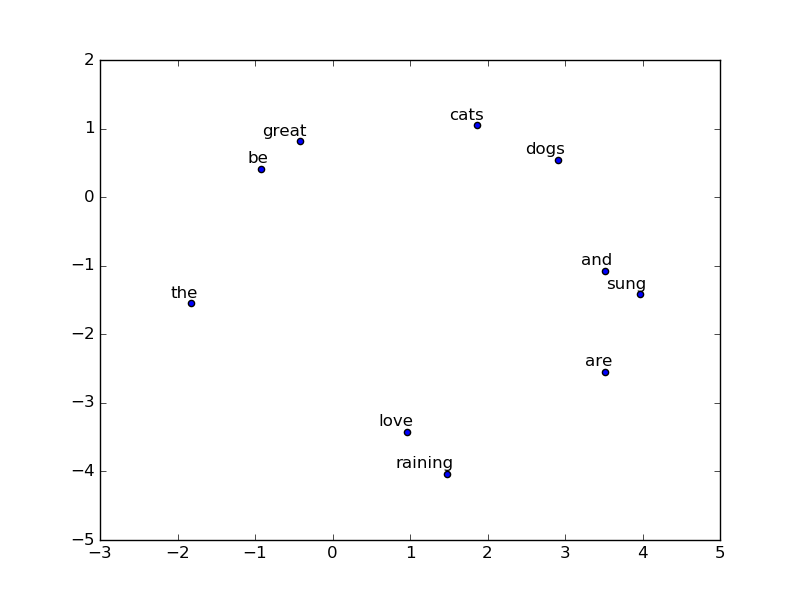

In [45]:
Image(filename='word2vec.png', width=600) 